## ESTADISTICA Y VISUALIZACION


Al igual que en los ejercicios de pair programming de estadística, deberéis elegir un set de datos, puede ser de cualquier tipo. El objetivo de este pair programming es:
Hacer una exploración inicial del dataframe.


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew
import scipy.stats as st

In [ ]:
#pd.options.display.max_columns=None

In [26]:
df=pd.read_csv('world_risk_index.csv')
df.head(5)

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


- ¿Cuántas filas tiene?

In [27]:
print(f'El archivo que elegimos tiene {df.shape[0]} filas y {df.shape[1]} columnas')

El archivo que elegimos tiene 1917 filas y 12 columnas


- ¿Cuántas nulos tiene?

In [28]:
nulos = df.isnull().sum()

print(f'El archivo que elegimos tiene {sum(nulos)} nulos')


El archivo que elegimos tiene 6 nulos


- ¿Y duplicados?

In [29]:
duplicados =df.duplicated().sum()

print(f'El archivo que elegimos tiene {duplicados} filas duplicadas')

El archivo que elegimos tiene 0 filas duplicadas


- ¿Qué tipo de datos tenemos en el dataframe?


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1917 entries, 0 to 1916
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Region                        1917 non-null   object 
 1   WRI                           1917 non-null   float64
 2   Exposure                      1917 non-null   float64
 3   Vulnerability                 1917 non-null   float64
 4   Susceptibility                1917 non-null   float64
 5   Lack of Coping Capabilities   1917 non-null   float64
 6    Lack of Adaptive Capacities  1916 non-null   float64
 7   Year                          1917 non-null   int64  
 8   Exposure Category             1917 non-null   object 
 9   WRI Category                  1916 non-null   object 
 10  Vulnerability Category        1913 non-null   object 
 11  Susceptibility Category       1917 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 179.8+ KB


- Otros 

In [31]:
df.columns #Los nombres de las columnas


Index(['Region', 'WRI', 'Exposure', 'Vulnerability', 'Susceptibility',
       'Lack of Coping Capabilities', ' Lack of Adaptive Capacities', 'Year',
       'Exposure Category', 'WRI Category', 'Vulnerability Category',
       'Susceptibility Category'],
      dtype='object')

In [36]:
df['Region'].unique

<bound method Series.unique of 0            Vanuatu
1              Tonga
2        Philippinen
3          Salomonen
4          Guatemala
            ...     
1912         Grenada
1913        Barbados
1914    Saudi Arabia
1915           Malta
1916           Qatar
Name: Region, Length: 1917, dtype: object>

In [37]:
df['Exposure'].unique

<bound method Series.unique of 0       56.33
1       56.04
2       45.09
3       36.40
4       38.42
        ...  
1912     3.13
1913     3.46
1914     2.93
1915     1.65
1916     0.28
Name: Exposure, Length: 1917, dtype: float64>

In [39]:
df['Exposure'].min()

0.05

In [40]:
df['Exposure'].max()

99.88

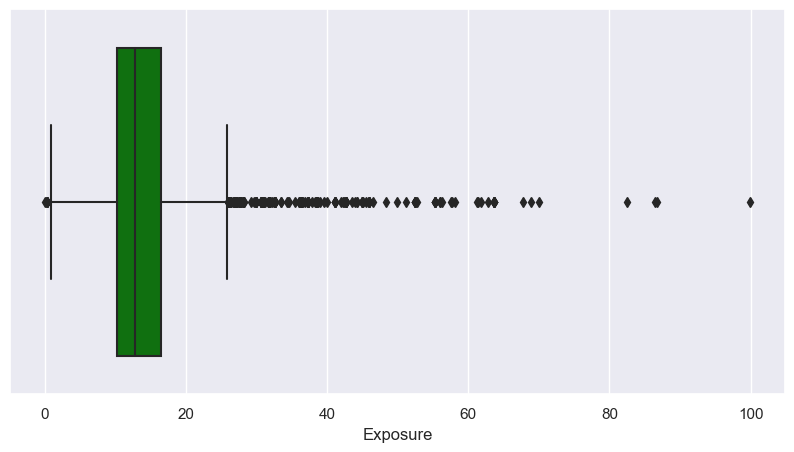

In [38]:
plt.figure(figsize = (10, 5))
sns.set(style="darkgrid")

sns.boxplot(data = df, x =  "Exposure", color=  "green");

In [41]:
q3 = np.percentile(df["Exposure"], [75])

In [42]:
q1 = np.percentile(df["Exposure"], [25])

In [43]:
rango_int = q3-q1

In [45]:
outlayers_max = q3+ (rango_int*1,5)
outlayers_max

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_45947/2936883199.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  outlayers_max = q3+ (rango_int*1,5)


array([array([22.74]), 21.45], dtype=object)

`Vemos que tenemos muchos outlayers y hemos decidido analizar solo estos en base a la columna 'Exposure' para poder analizar aquellas regiones que tienen mas riesgo de sufrir desastres naturales.`

In [54]:
df_suceptibles = df[ df['Exposure'] >21.45] #Creamos un nuevo dataframe
df_suceptibles

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1767,Chile,11.65,30.95,37.66,19.67,58.61,34.70,2016,Very High,Very High,Low,Low
1769,Guyana,11.39,22.90,49.72,27.16,78.96,43.05,2016,Very High,Very High,Medium,Medium
1772,Dominican Republic,10.96,23.14,47.36,27.55,73.16,41.38,2016,Very High,Very High,Medium,Medium
1794,Netherlands,8.24,30.57,26.94,15.46,41.23,24.14,2016,Very High,High,Very Low,Very Low


<Figure size 800x400 with 0 Axes>

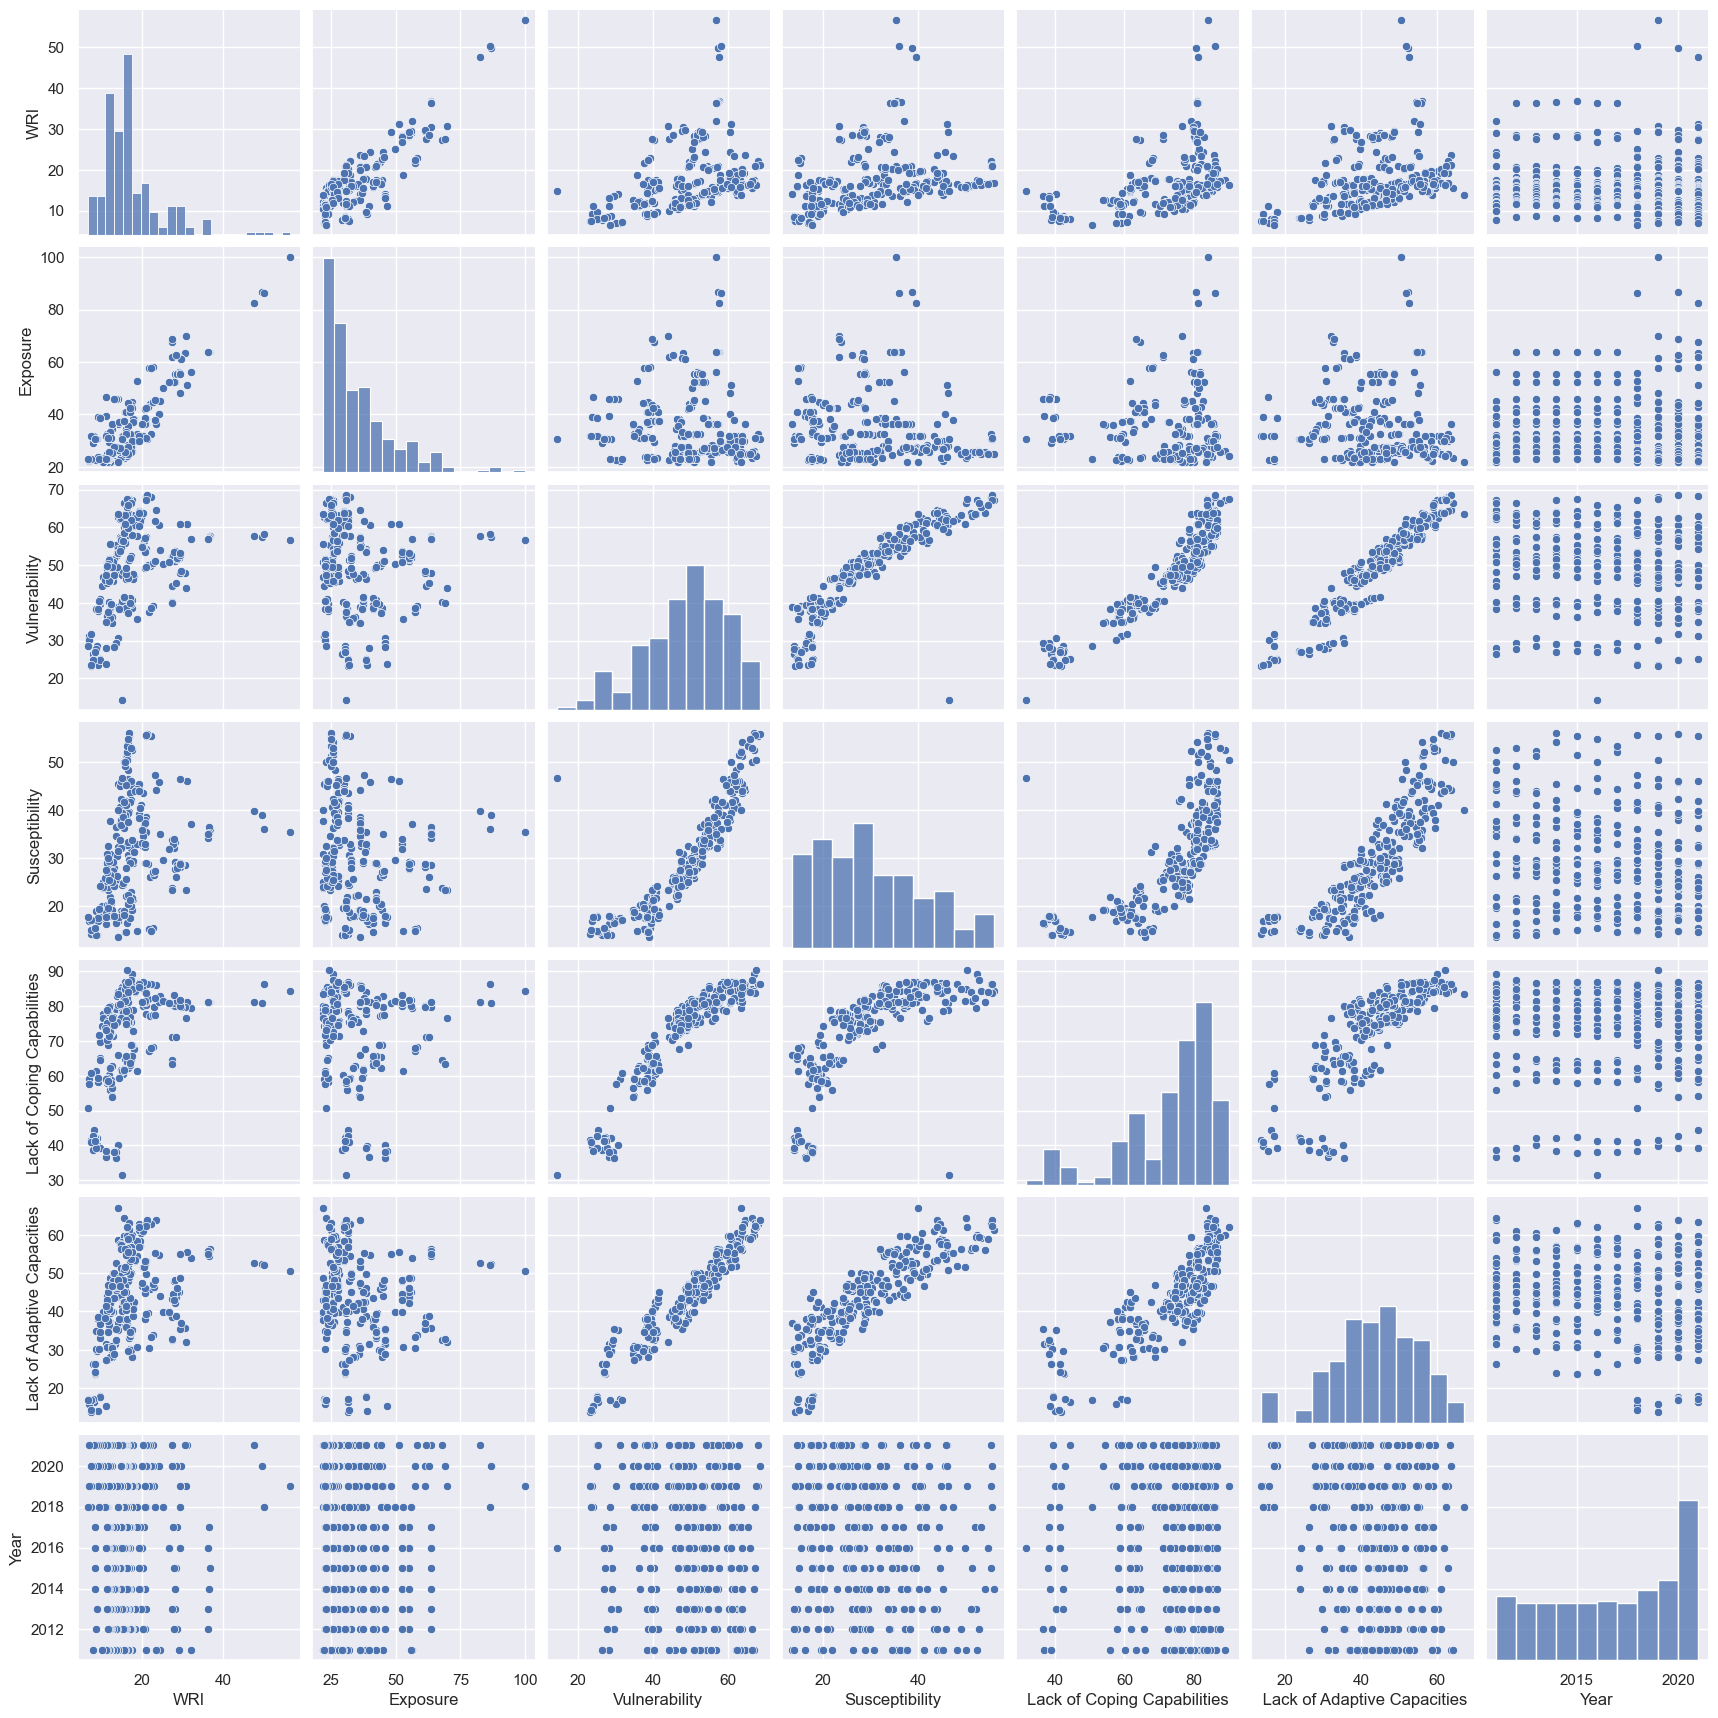

In [55]:
plt.figure(figsize =(8,4))


sns.pairplot(data = df_suceptibles)

plt.show()

In [56]:
correlacion = df_suceptibles.corr() # Calculamos la correlacion
correlacion

/var/folders/db/hp0l5_js4yv8br5y2tc3frpm0000gn/T/ipykernel_45947/401274129.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlacion = df_suceptibles.corr()


,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year
WRI,1.000000,0.854587,0.406949,0.321832,0.431028,0.384041,0.042447
Exposure,0.854587,1.000000,-0.094435,-0.145025,-0.042521,-0.099360,0.105813
Vulnerability,0.406949,-0.094435,1.000000,0.889960,0.932907,0.952424,-0.107303
Susceptibility,0.321832,-0.145025,0.889960,1.000000,0.730823,0.861988,-0.113156
Lack of Coping Capabilities,0.431028,-0.042521,0.932907,0.730823,1.000000,0.824580,-0.012399
Lack of Adaptive Capacities,0.384041,-0.099360,0.952424,0.861988,0.824580,1.000000,-0.199090
Year,0.042447,0.105813,-0.107303,-0.113156,-0.012399,-0.199090,1.000000


1) Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.

1) Relacion entre vulnerabilidad y capacidad de adaptacion
2)

2) Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.

`Vemos a traves del coeficiente de correlacion que cuanto mas vulnerable es una region su capacidad de adaptacion es positiva y muy cercana a 1 (0.95)`